In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
plt.style.use('dark_background')
pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)

In [9]:
df=pd.read_excel(r'E:\Msc Tiss\Competitions\Coherence\Data_Comp.xlsx')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25999 entries, 0 to 25998
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  25999 non-null  int64 
 1   Education            25999 non-null  object
 2   Education Yrs        25999 non-null  int64 
 3   Marital Status       25999 non-null  object
 4   Employer             25999 non-null  object
 5   Occupation           25999 non-null  object
 6   Relationship Status  25999 non-null  object
 7   Sex                  25999 non-null  object
 8   Capital Gain         25999 non-null  int64 
 9   Capital Loss         25999 non-null  int64 
 10  Hours per Week       25999 non-null  int64 
 11  Native Country       25999 non-null  object
 12  Salary               25999 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 2.6+ MB


In [11]:
df.shape

(25999, 13)

In [12]:
round(df.isnull().mean()*100,2).sort_values(ascending = False)

Age                    0.0
Education              0.0
Education Yrs          0.0
Marital Status         0.0
Employer               0.0
Occupation             0.0
Relationship Status    0.0
Sex                    0.0
Capital Gain           0.0
Capital Loss           0.0
Hours per Week         0.0
Native Country         0.0
Salary                 0.0
dtype: float64

In [13]:
df['Salary'].quantile([0,0.2,0.4,0.6,0.8,1])

0.0      12285.0
0.2     106900.0
0.4     158802.0
0.6     196275.6
0.8     259507.0
1.0    1484705.0
Name: Salary, dtype: float64

In [14]:
df['Sex'].value_counts()

 Male      17398
 Female     8601
Name: Sex, dtype: int64

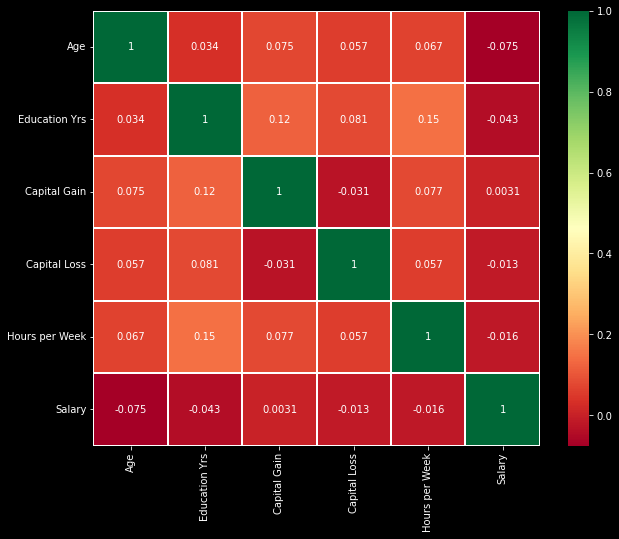

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [16]:
#Getting the top 10 correlation in NEWAPP0
corr=df.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

C:\Users\ppk7s\AppData\Local\Temp\ipykernel_13292\2947239059.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()


,Column1,Column2,Correlation,Abs_Correlation
25,Hours per Week,Education Yrs,0.147326,0.147326
13,Capital Gain,Education Yrs,0.122232,0.122232
19,Capital Loss,Education Yrs,0.080523,0.080523
26,Hours per Week,Capital Gain,0.076595,0.076595
30,Salary,Age,-0.074705,0.074705
12,Capital Gain,Age,0.074697,0.074697
24,Hours per Week,Age,0.067136,0.067136
18,Capital Loss,Age,0.057057,0.057057
27,Hours per Week,Capital Loss,0.056582,0.056582
31,Salary,Education Yrs,-0.043268,0.043268


In [17]:
############ Count number of Categorical and Numerical Columns ######################
categorical_columns = ['Education', 'Marital Status', 'Employer','Occupation','Relationship Status','Native Country']
print(categorical_columns)
numerical_columns = ['Age','Education Yrs','Capital Gain','Capital Loss','Hours per Week']
print(numerical_columns)

['Education', 'Marital Status', 'Employer', 'Occupation', 'Relationship Status', 'Native Country']
['Age', 'Education Yrs', 'Capital Gain', 'Capital Loss', 'Hours per Week']


In [18]:
def visualisation(x,y):
    plt.scatter(df[x],df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show
    


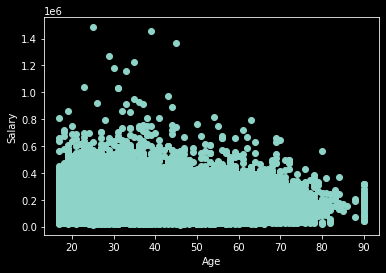

In [19]:
visualisation('Age','Salary')
#visualisation('Education Yrs','Salary')
#visualisation('Capital Gain','Salary')
#visualisation('Capital Loss','Salary')
#visualisation('Hours per Week','Salary')

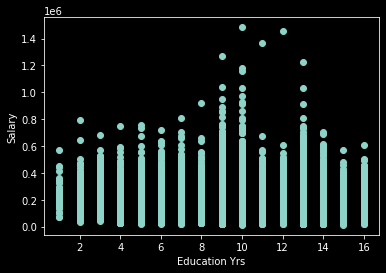

In [22]:
visualisation('Education Yrs','Salary')

                Age  Education Yrs  Capital Gain  Capital Loss  Hours per Week
count  25999.000000   25999.000000  25999.000000  25999.000000    25999.000000
mean      38.627140      10.080695   1093.117120     86.716874       40.415670
std       13.682985       2.563155   7489.212503    401.845835       12.311183
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000


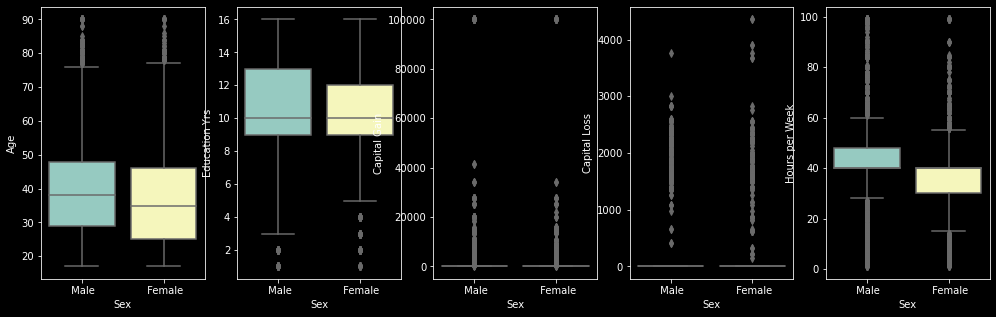

In [20]:
fig,axes = plt.subplots(1,5,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Sex',ax=axes[idx])
print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [24]:
train_df=pd.read_excel(r'E:\Msc Tiss\Competitions\Coherence\Data_Comp.xlsx')

In [25]:
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,Age,Education Yrs,Capital Gain,Capital Loss,Hours per Week,Salary,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital Status_ Married-AF-spouse,Marital Status_ Married-civ-spouse,Marital Status_ Married-spouse-absent,Marital Status_ Never-married,Marital Status_ Separated,Marital Status_ Widowed,Employer_ Federal-gov,Employer_ Local-gov,Employer_ Never-worked,Employer_ Private,Employer_ Self-emp-inc,Employer_ Self-emp-not-inc,Employer_ State-gov,Employer_ Without-pay,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship Status_ Not-in-family,Relationship Status_ Other-relative,Relationship Status_ Own-child,Relationship Status_ Unmarried,Relationship Status_ Wife,Sex_ Male,Native Country_ Cambodia,Native Country_ Canada,Native Country_ China,Native Country_ Columbia,Native Country_ Cuba,Native Country_ Dominican-Republic,Native Country_ Ecuador,Native Country_ El-Salvador,Native Country_ England,Native Country_ France,Native Country_ Germany,Native Country_ Greece,Native Country_ Guatemala,Native Country_ Haiti,Native Country_ Holand-Netherlands,Native Country_ Honduras,Native Country_ Hong,Native Country_ Hungary,Native Country_ India,Native Country_ Iran,Native Country_ Ireland,Native Country_ Italy,Native Country_ Jamaica,Native Country_ Japan,Native Country_ Laos,Native Country_ Mexico,Native Country_ Nicaragua,Native Country_ Outlying-US(Guam-USVI-etc),Native Country_ Peru,Native Country_ Philippines,Native Country_ Poland,Native Country_ Portugal,Native Country_ Puerto-Rico,Native Country_ Scotland,Native Country_ South,Native Country_ Taiwan,Native Country_ Thailand,Native Country_ Trinadad&Tobago,Native Country_ United-States,Native Country_ Vietnam,Native Country_ Yugoslavia
0,39,13,2174,0,40,77516,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,83311,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,215646,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,234721,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,338409,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
df=df.dropna()

In [31]:
X = train_df.drop(["Salary"], axis=1)

In [32]:
y = train_df['Salary']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [34]:
X_train.shape

(20799, 12)

In [35]:
X_test.shape

(5200, 12)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axes = plt.subplots(5,2,figsize=(14,18))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
sns.countplot(x=cat_col,data=train_df,hue='Salary',ax=axes[row,col])
plt.subplots_adjust(hspace=1)